In [5]:
import pickle
with open('newsgroups', 'rb') as f:
  newsgroup_data = pickle.load(f)

Import necessary libraries for text preprocessing and define the preprocessing function.



In [6]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (if not already downloaded)
try:
    stopwords = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stopwords = set(stopwords.words('english'))

try:
    lemmatizer = WordNetLemmatizer()
except LookupError:
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Preprocesses text data by removing punctuation, stop words, and applying lemmatization.
    """
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    # Remove stop words and apply lemmatization
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords]
    # Join tokens back into a string
    return ' '.join(processed_tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Apply the preprocessing function to the newsgroup data and store the cleaned text.



In [9]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (if not already downloaded)
try:
    stopwords = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stopwords = set(stopwords.words('english'))

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
finally:
    lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    """
    Preprocesses text data by removing punctuation, stop words, and applying lemmatization.
    """
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    # Remove stop words and apply lemmatization
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords]
    # Join tokens back into a string
    return ' '.join(processed_tokens)

cleaned_newsgroups = [preprocess_text(doc) for doc in newsgroup_data]

[nltk_data] Downloading package wordnet to /root/nltk_data...


Convert the cleaned text data into numerical features using TF-IDF as instructed.



In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned data
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_newsgroups)

print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (2000, 24167)


Import the necessary class and train the LDA model on the TF-IDF matrix.



In [11]:
from sklearn.decomposition import LatentDirichletAllocation

# Instantiate LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit the LDA model to the tfidf_matrix
lda_model.fit(tfidf_matrix)

LatentDirichletAllocation(random_state=42)

Import the NMF class, instantiate the NMF model, and fit it to the tfidf matrix as per the instructions.



In [12]:
from sklearn.decomposition import NMF

# Instantiate NMF
nmf_model = NMF(n_components=10, random_state=42, init='nndsvda')

# Fit the NMF model to the tfidf_matrix
nmf_model.fit(tfidf_matrix)

NMF(init='nndsvda', n_components=10, random_state=42)

Generate and display the top 10 words and word clouds for each topic in the LDA and NMF models.



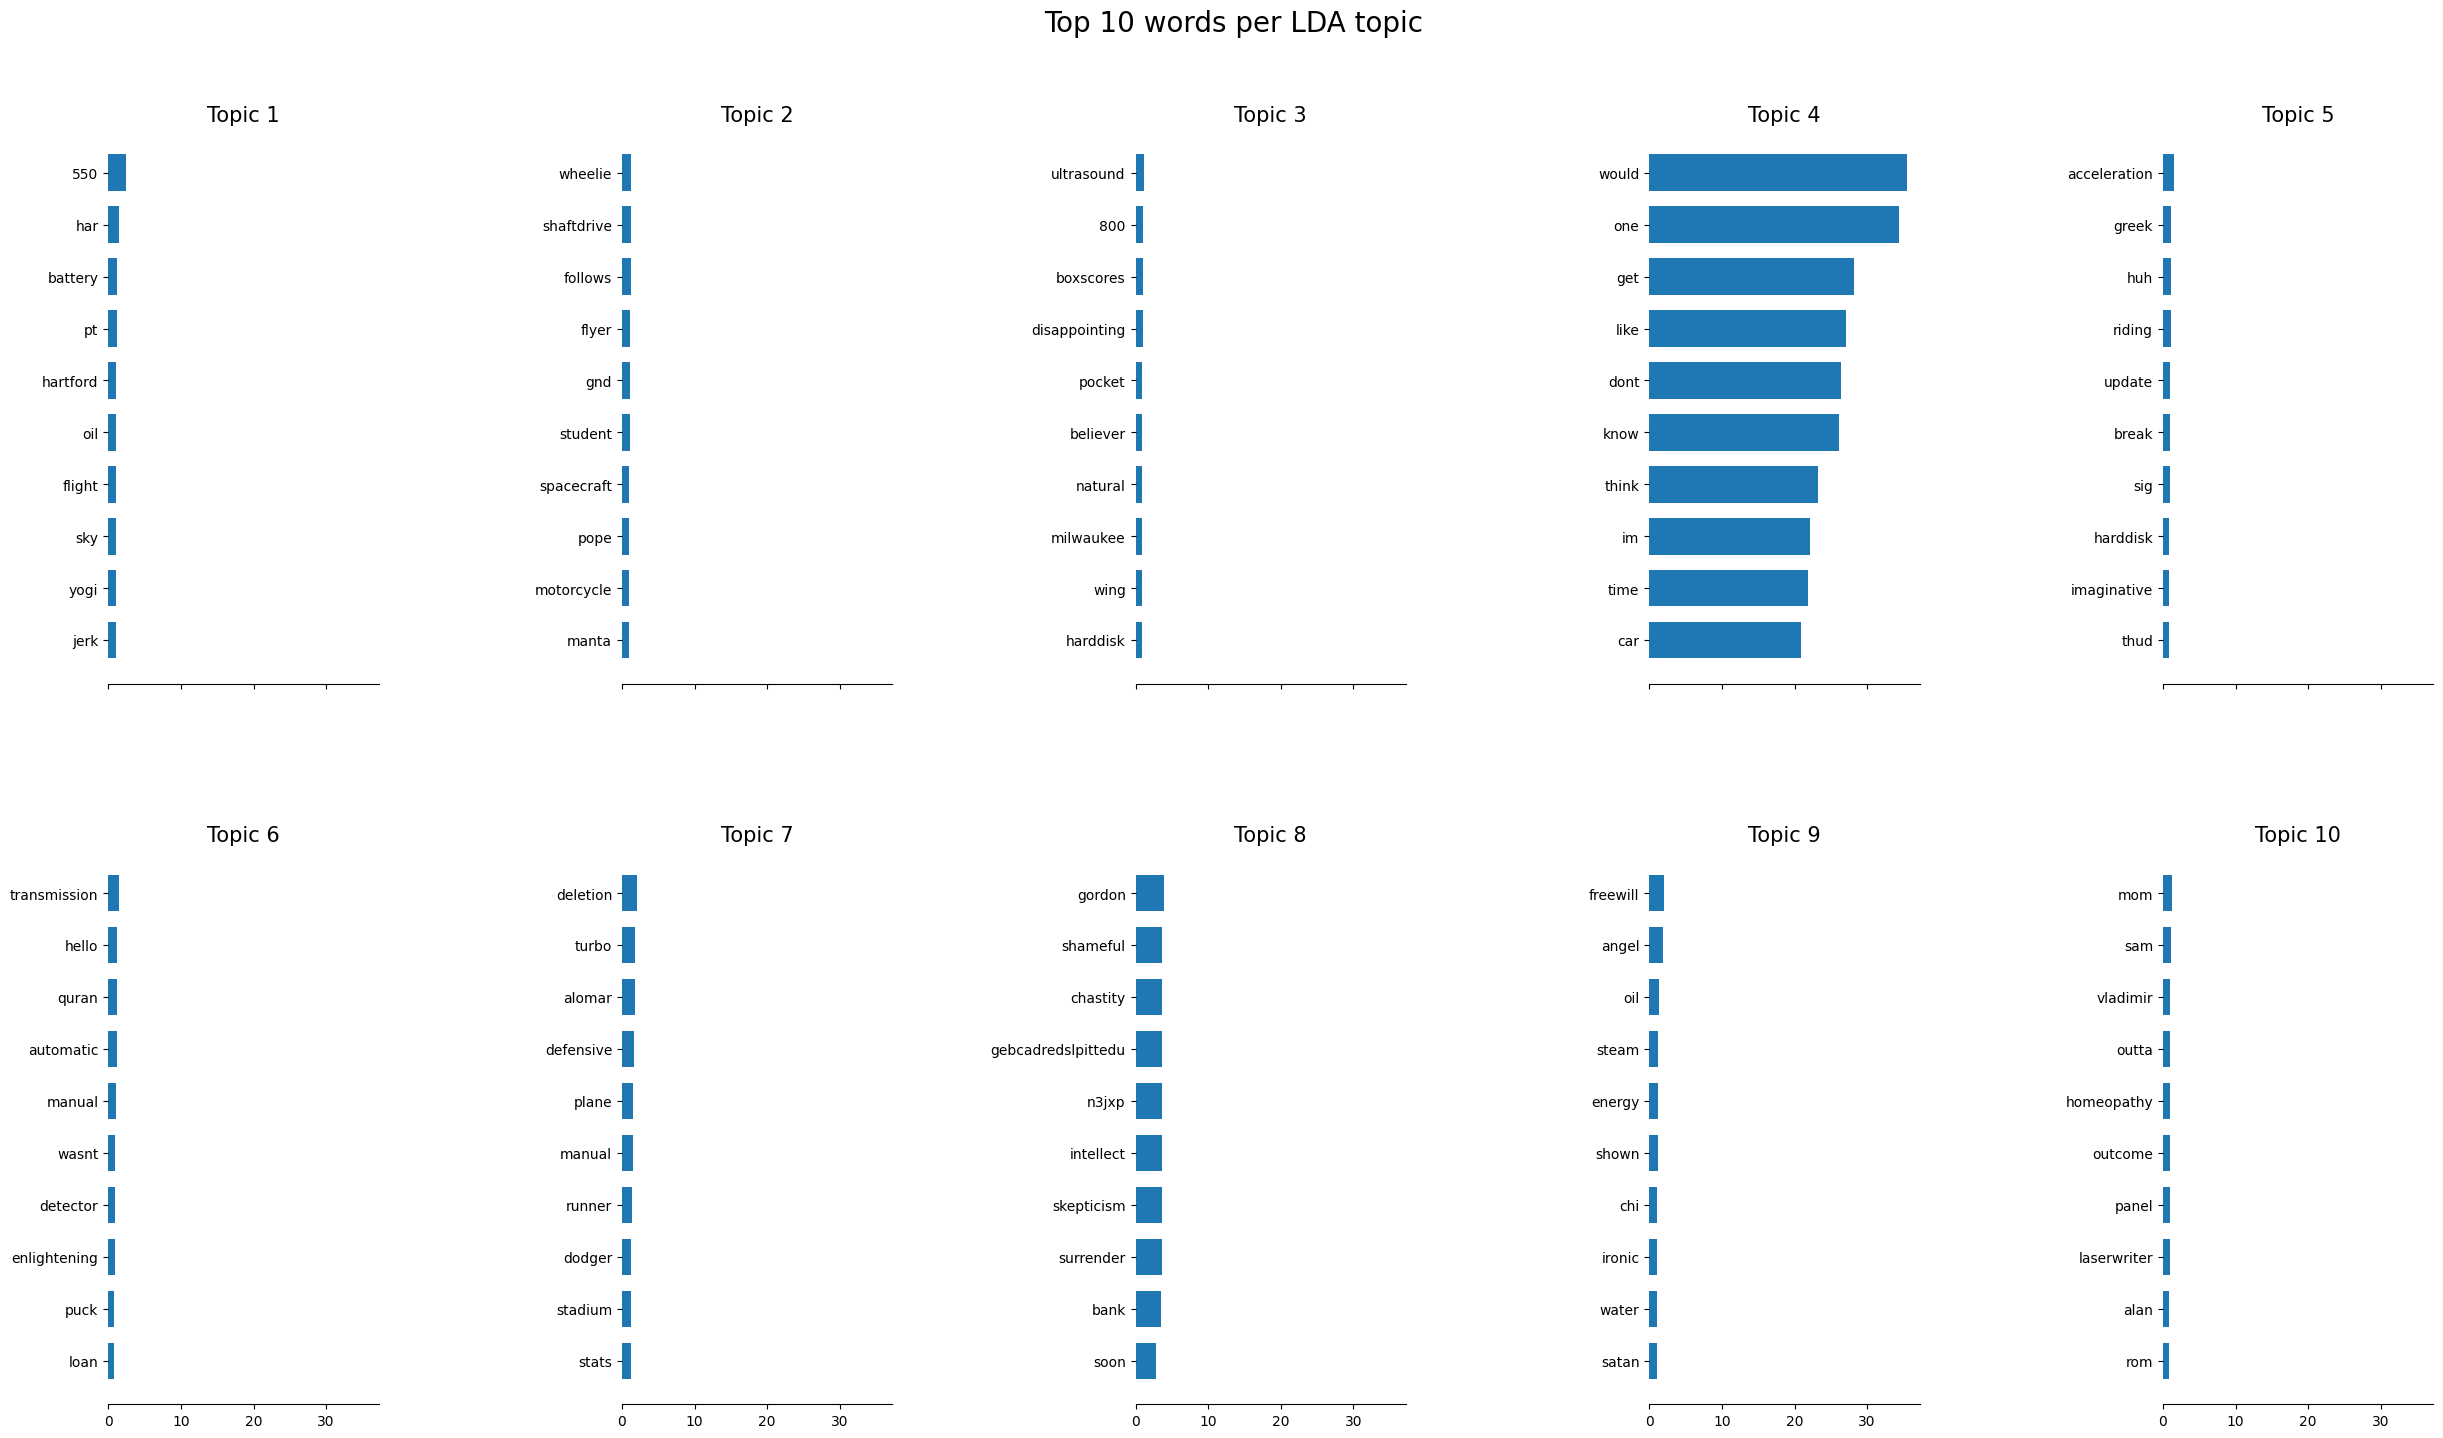

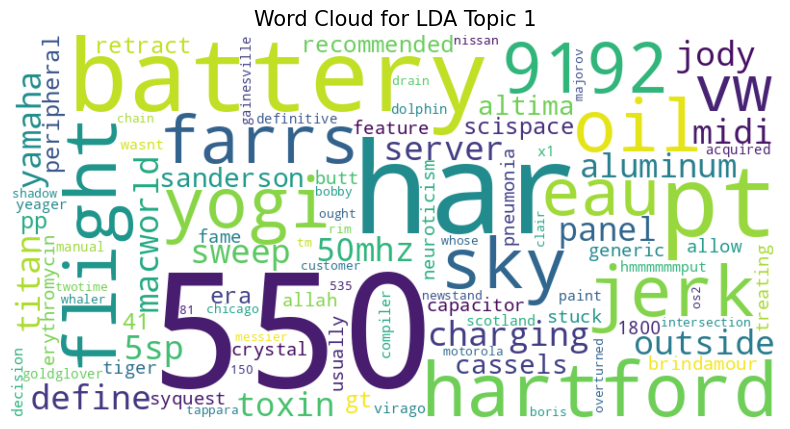

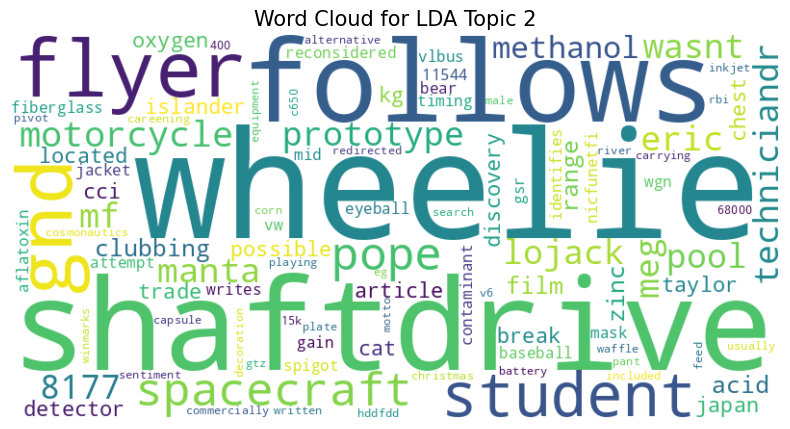

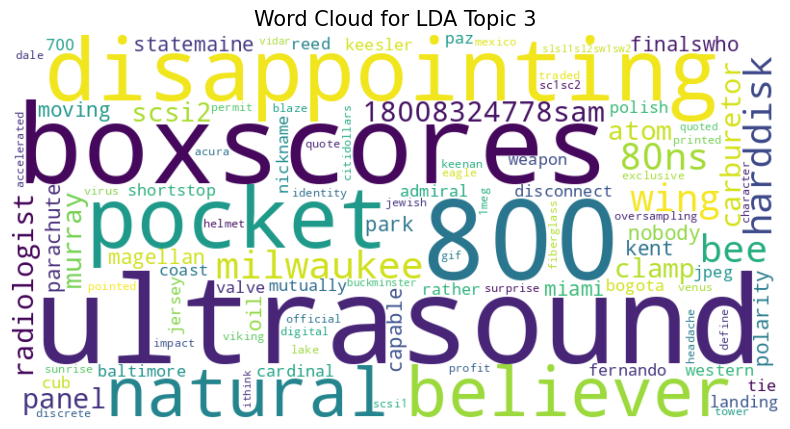

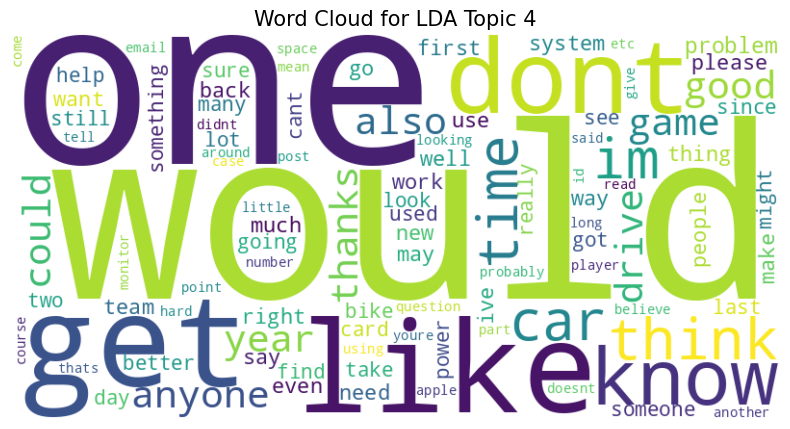

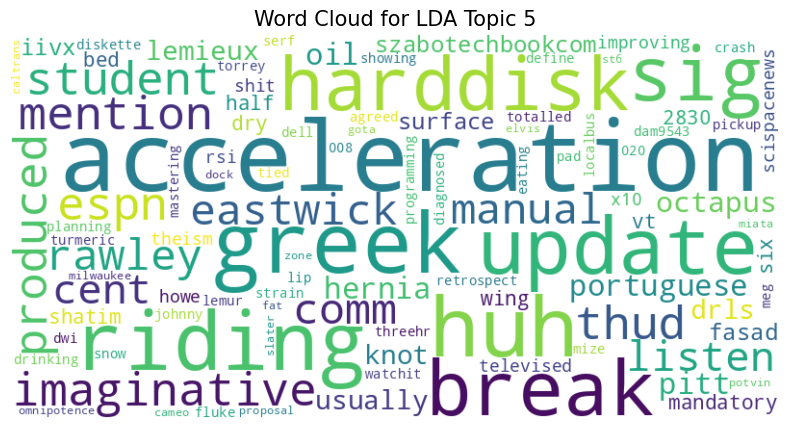

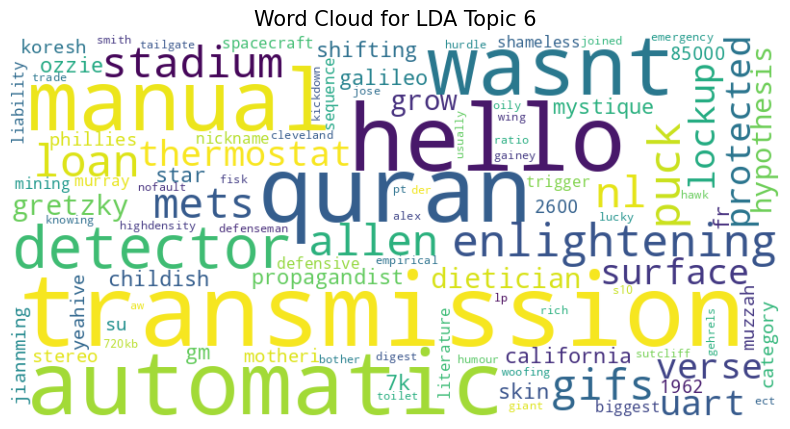

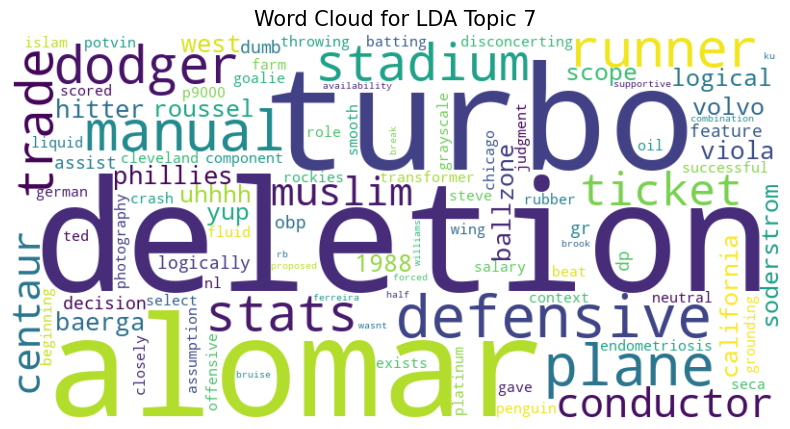

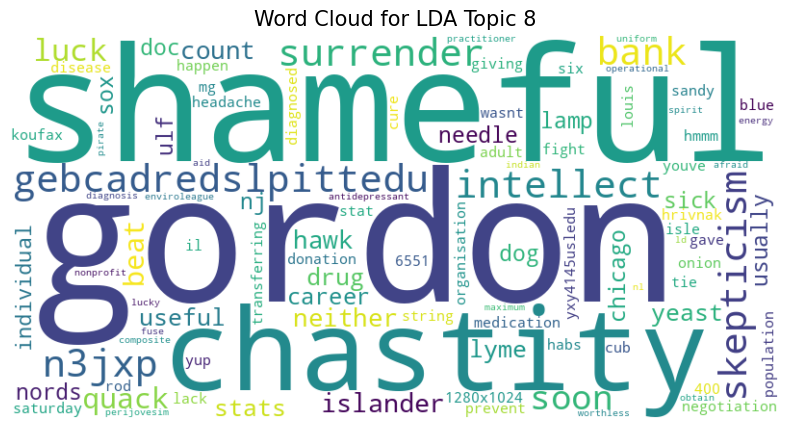

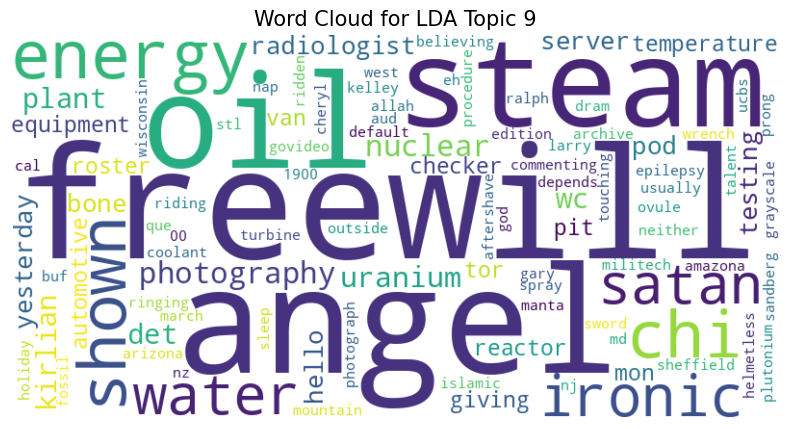

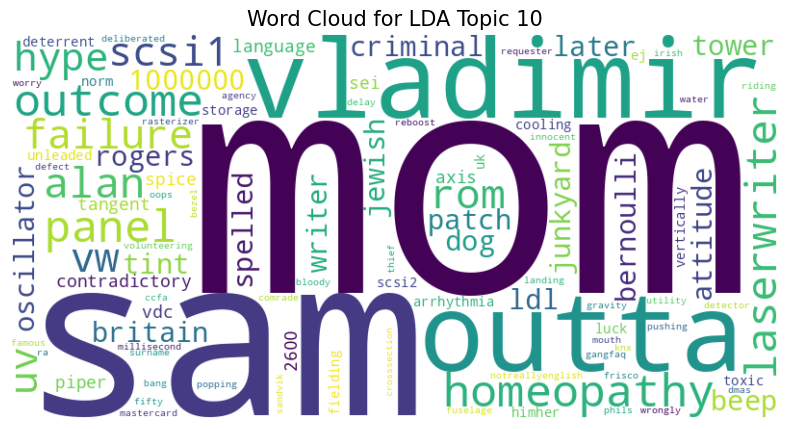

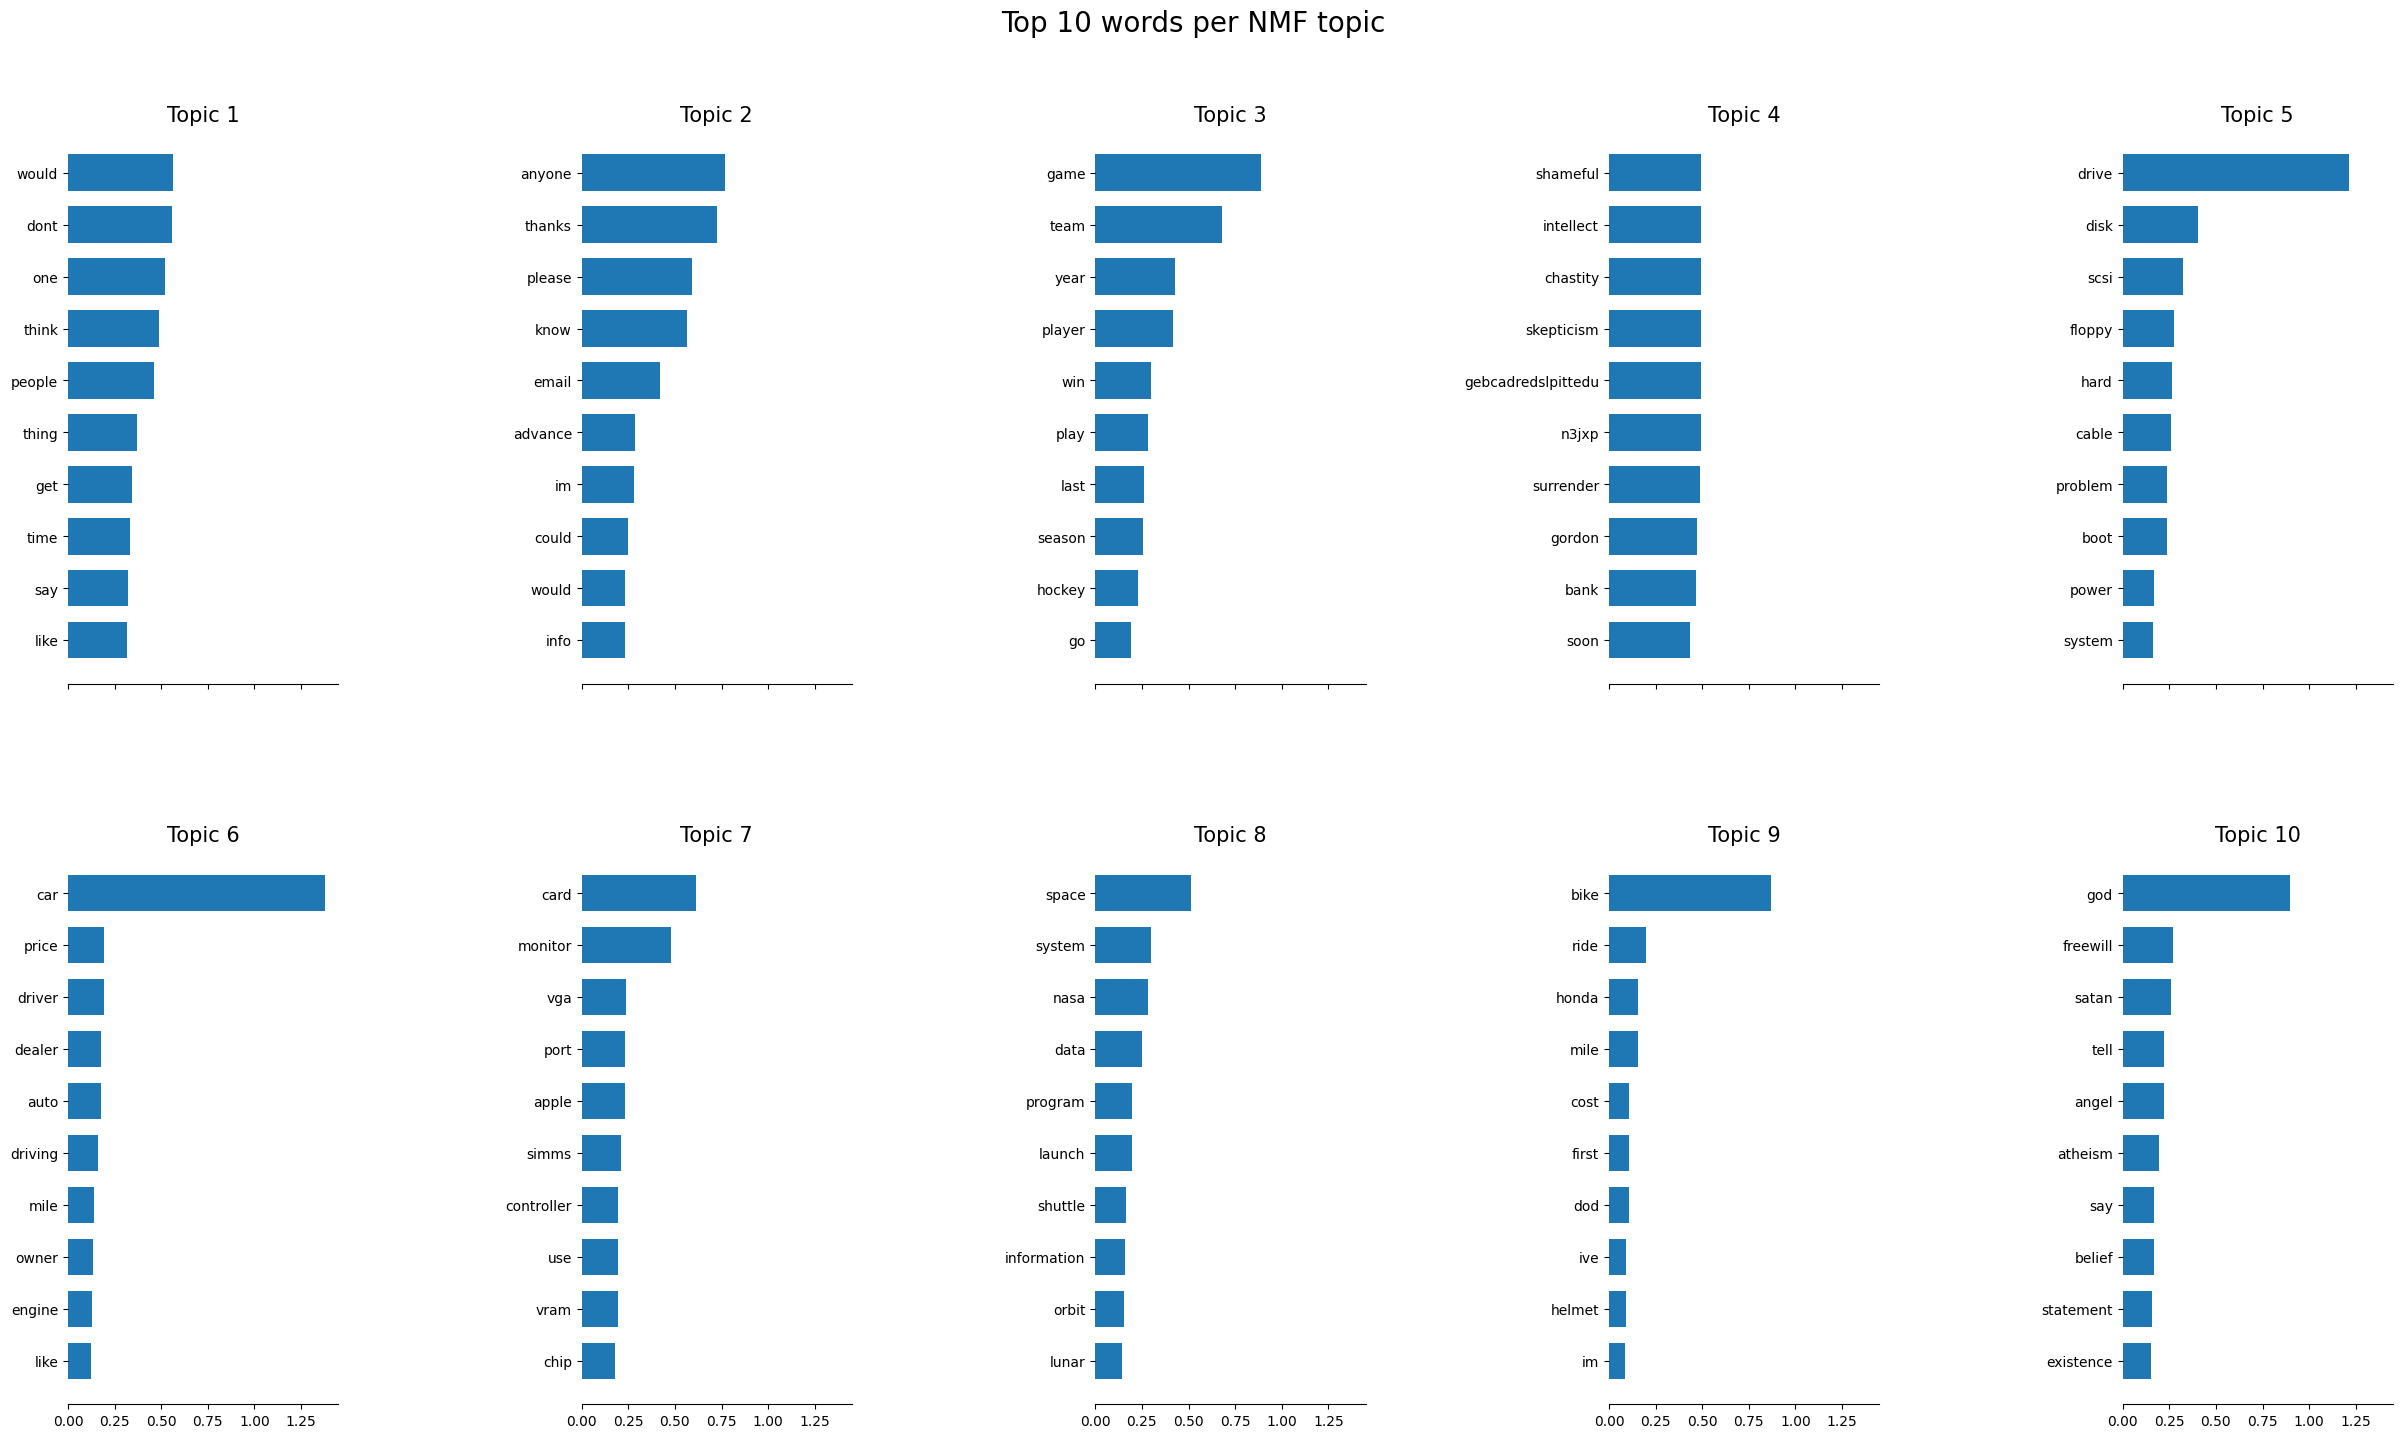

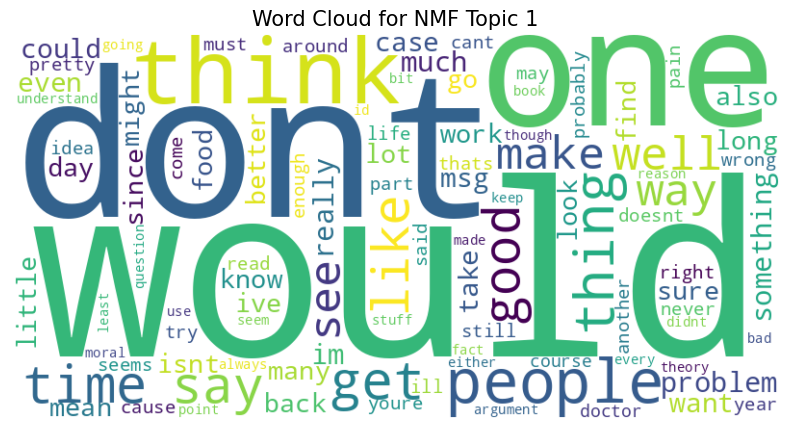

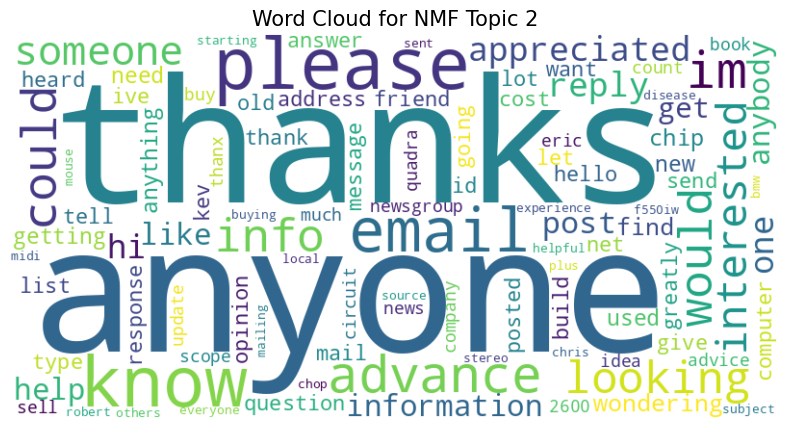

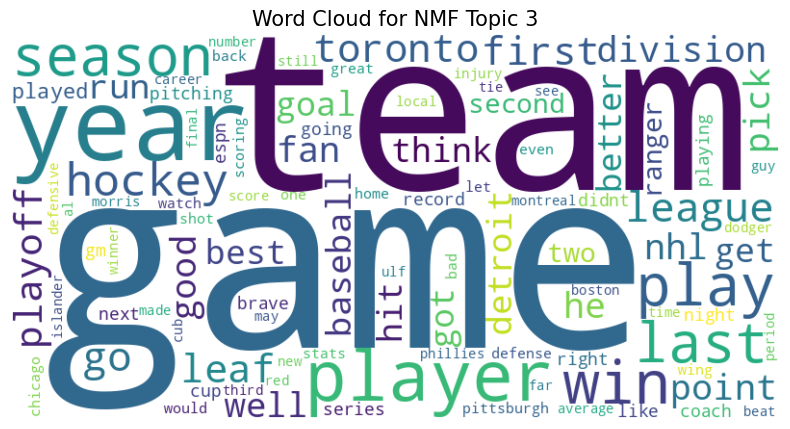

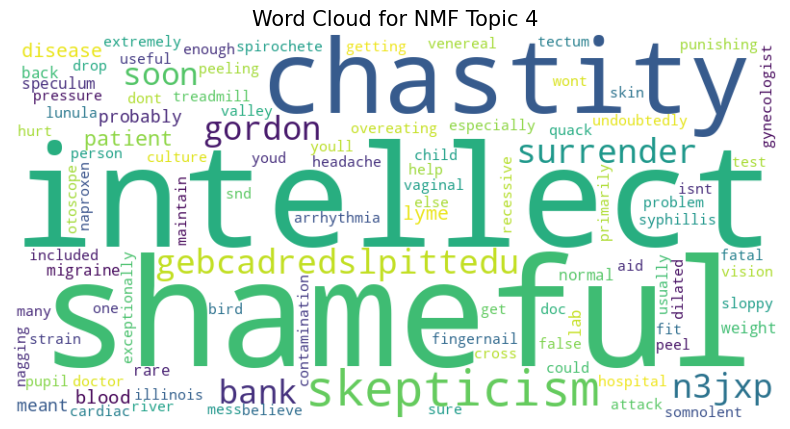

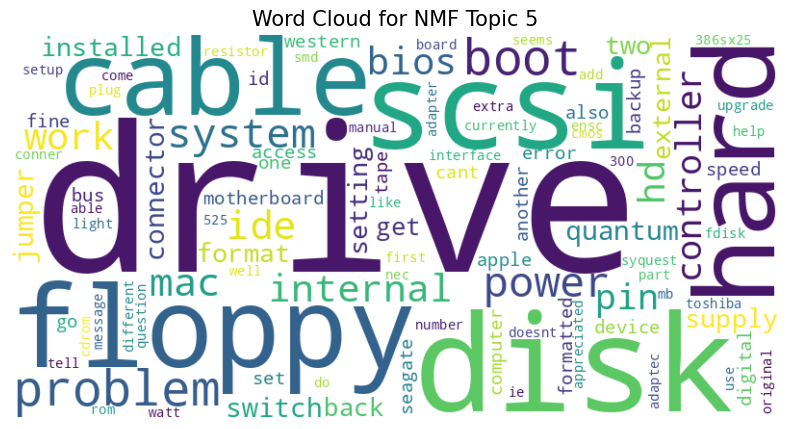

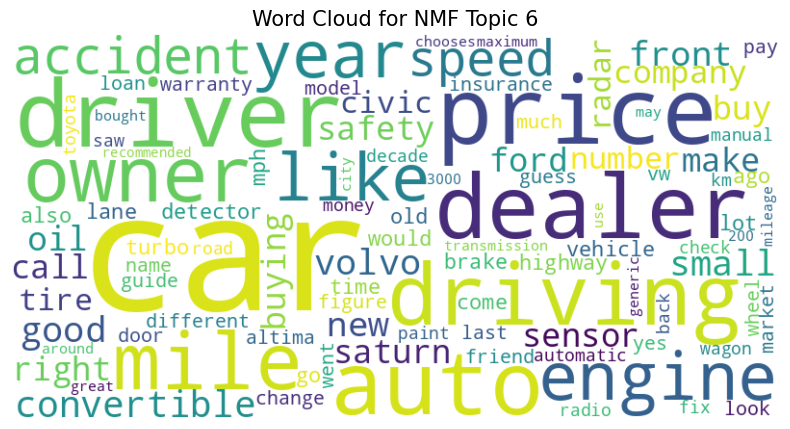

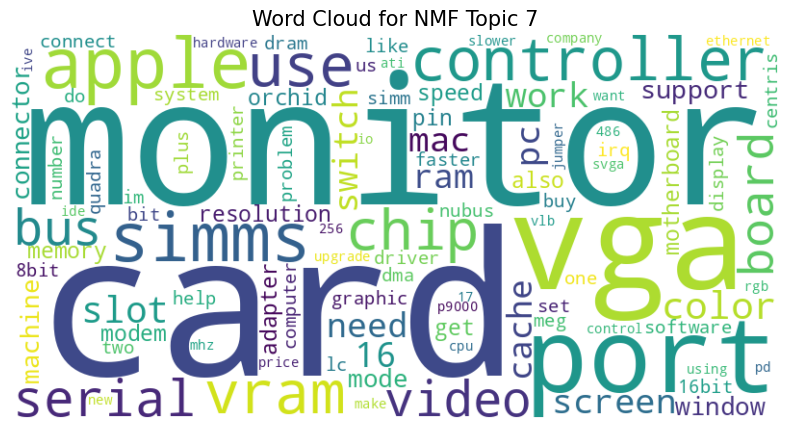

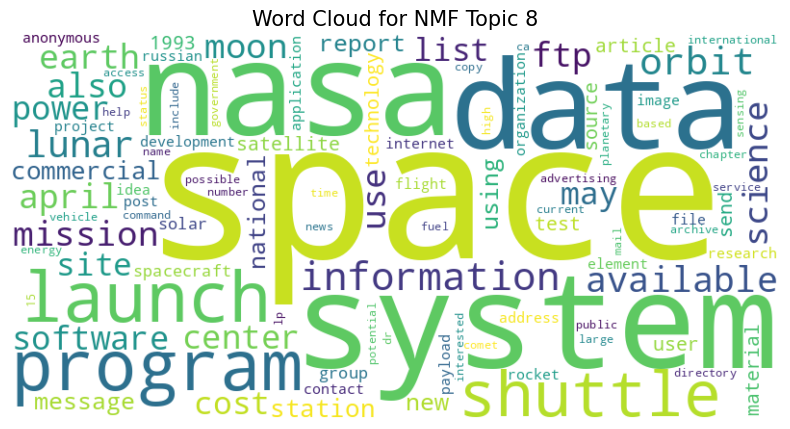

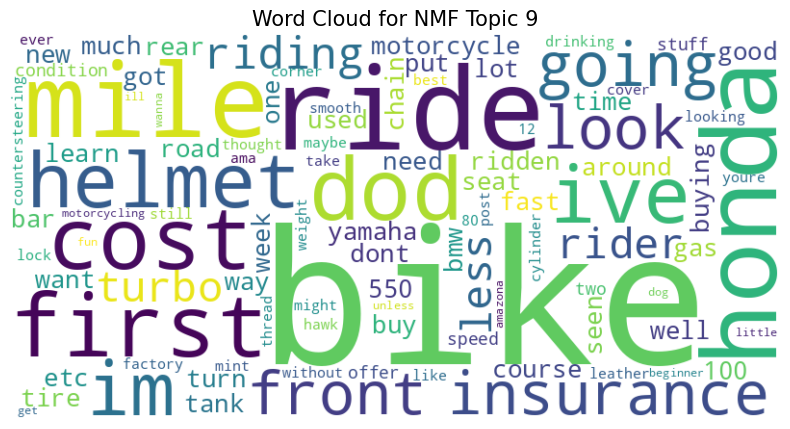

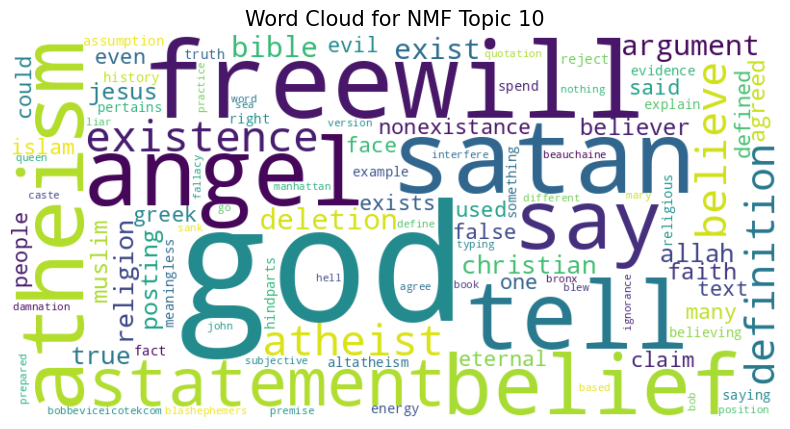

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Function to plot top words
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)

    fig.suptitle(title, fontsize=20)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Function to generate and display word cloud
def generate_wordcloud(topic, feature_names, title):
    word_weights = {feature_names[i]: topic[i] for i in topic.argsort()[:-100:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_weights)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=15)
    plt.show()

# Plot and generate word clouds for LDA topics
plot_top_words(lda_model, feature_names, 10, 'Top 10 words per LDA topic')
for topic_idx, topic in enumerate(lda_model.components_):
    generate_wordcloud(topic, feature_names, f'Word Cloud for LDA Topic {topic_idx + 1}')

# Plot and generate word clouds for NMF topics
plot_top_words(nmf_model, feature_names, 10, 'Top 10 words per NMF topic')
for topic_idx, topic in enumerate(nmf_model.components_):
    generate_wordcloud(topic, feature_names, f'Word Cloud for NMF Topic {topic_idx + 1}')

## Conclusion

Both LDA and NMF found 10 main themes in the news articles.

The themes from LDA had words that were a bit more spread out. Some words might show up as important in a few different themes.

On the other hand, the themes from NMF were usually clearer, with important words sticking more to one main theme. This makes NMF's themes sometimes easier to quickly understand.

Both methods successfully found topics, and they often found similar types of topics (like technology or sports). However, NMF generally did a better job of making each topic feel more distinct and focused, making it a bit easier to figure out what each theme is about just by looking at the key words.